# `Anomaly Detection in Multivariate Time Series Data`

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,1/1/2017 0:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,1/1/2017 0:05,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,1/1/2017 0:10,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,1/1/2017 0:15,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,1/1/2017 0:20,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [3]:
data.shape

(377719, 7)

In [4]:
data.describe()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719,377719,377719,377719,377719,377719,377719
unique,377719,39736,39662,27669,26487,48044,24010
top,1/1/2017 0:00,Not Connect,0,Not Connect,Not Connect,28.88,Not Connect
freq,1,723,14226,723,723,2036,723


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   time                      377719 non-null  object
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object
 2   Cyclone_Material_Temp     377719 non-null  object
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object
 4   Cyclone_cone_draft        377719 non-null  object
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object
 6   Cyclone_Inlet_Draft       377719 non-null  object
dtypes: object(7)
memory usage: 20.2+ MB


In [6]:
import general_overview as summary   # my function
summary.summary_report_general(data)

,column_name,data_type,missing,missing%,uniques,unique%,count
0,time,object,0,0.0,377719,100.000000,377719
1,Cyclone_Inlet_Gas_Temp,object,0,0.0,39736,10.519990,377719
2,Cyclone_Material_Temp,object,0,0.0,39662,10.500398,377719
3,Cyclone_Outlet_Gas_draft,object,0,0.0,27669,7.325287,377719
4,Cyclone_cone_draft,object,0,0.0,26487,7.012356,377719
5,Cyclone_Gas_Outlet_Temp,object,0,0.0,48044,12.719508,377719
6,Cyclone_Inlet_Draft,object,0,0.0,24010,6.356577,377719


## `Change null values with np.nan`

In [7]:
data = data.replace(to_replace='Not Connect',value=np.nan)
data = data.replace(to_replace='I/O Timeout',value=np.nan)
data = data.replace(to_replace='Scan Timeout',value=np.nan)
data = data.replace(to_replace='Configure',value=np.nan)
data = data.replace(to_replace='Comm Fail',value=np.nan)
data = data.replace(to_replace='Unit Down',value=np.nan)

In [8]:
data[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']] = data[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']].astype(float)

In [9]:
data.dtypes

time                         object
Cyclone_Inlet_Gas_Temp      float64
Cyclone_Material_Temp       float64
Cyclone_Outlet_Gas_draft    float64
Cyclone_cone_draft          float64
Cyclone_Gas_Outlet_Temp     float64
Cyclone_Inlet_Draft         float64
dtype: object

## `Linear Interpolation for fill missing values`
### [Interpolation – Power of Interpolation in Python to fill Missing Values](https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/)

In [10]:
data.Cyclone_cone_draft = data.Cyclone_cone_draft.interpolate()
data.Cyclone_Gas_Outlet_Temp = data.Cyclone_Gas_Outlet_Temp.interpolate()
data.Cyclone_Inlet_Draft = data.Cyclone_Inlet_Draft.interpolate()
data.Cyclone_Inlet_Gas_Temp = data.Cyclone_Inlet_Gas_Temp.interpolate()
data.Cyclone_Material_Temp = data.Cyclone_Material_Temp.interpolate()
data.Cyclone_Outlet_Gas_draft = data.Cyclone_Outlet_Gas_draft.interpolate()

In [11]:
data.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [12]:
data.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719.000000,377719.000000,377719.000000,377719.000000,377719.000000,377719.000000
mean,726.025533,749.403034,-177.451478,-164.249238,714.456558,-141.017003
std,329.747766,352.074936,99.383821,90.310021,326.387912,77.786361
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,855.880000,867.070000,-247.150000,-226.730000,799.095000,-193.450000
50%,882.320000,913.230000,-215.080000,-198.430000,871.380000,-169.350000
75%,901.080000,943.580000,-169.250000,-142.370000,899.230000,-135.520000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


In [13]:
data.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

In [14]:
cat = []
num = []
for i in data.columns:
    if data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

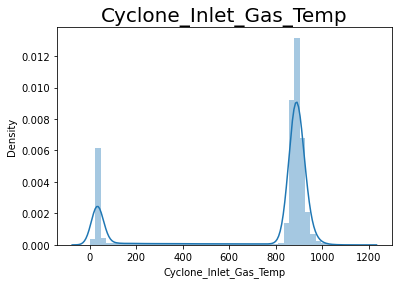

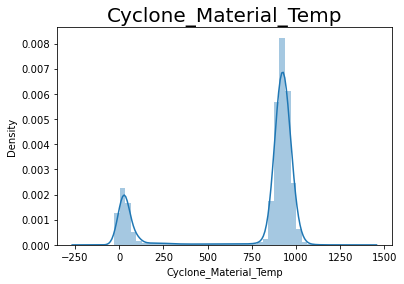

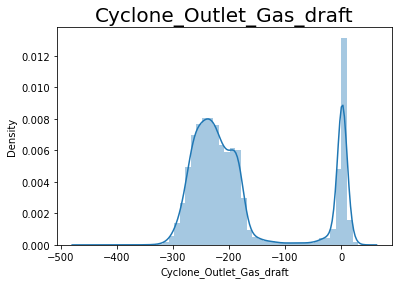

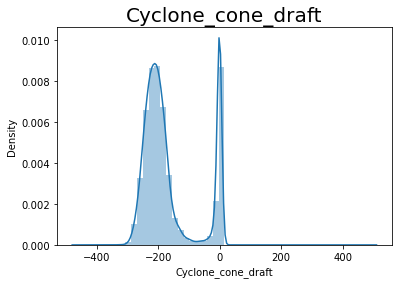

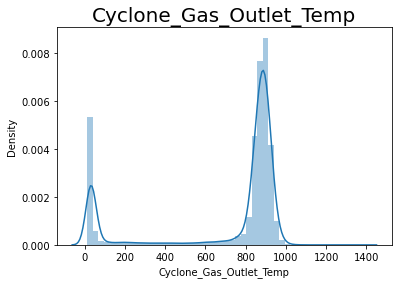

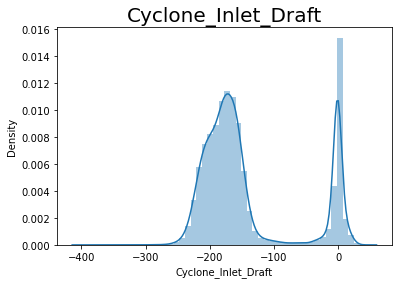

In [15]:
for i in num:
    plt.title(i,fontsize=20)
    sns.distplot(data[i])
    plt.show()

In [16]:
data['timestamp'] = pd.to_datetime(data['time'])
data.drop('time',axis=1,inplace=True)

In [17]:
data.columns

Index(['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'timestamp'],
      dtype='object')

## `Plot all the numerical column wrt time`

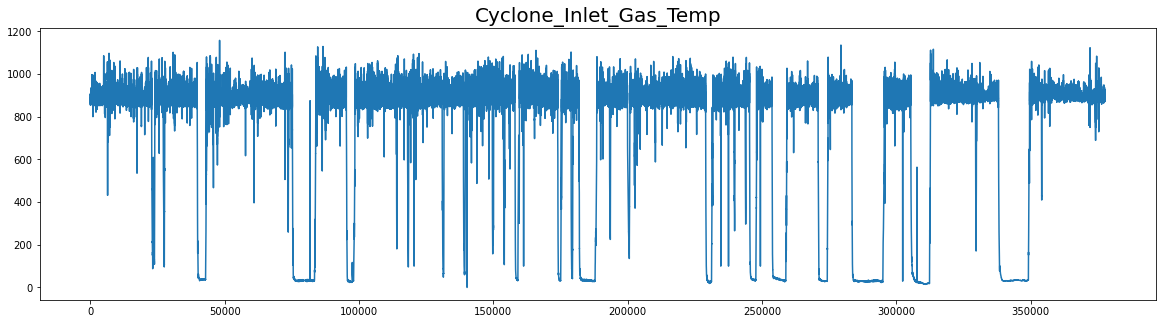

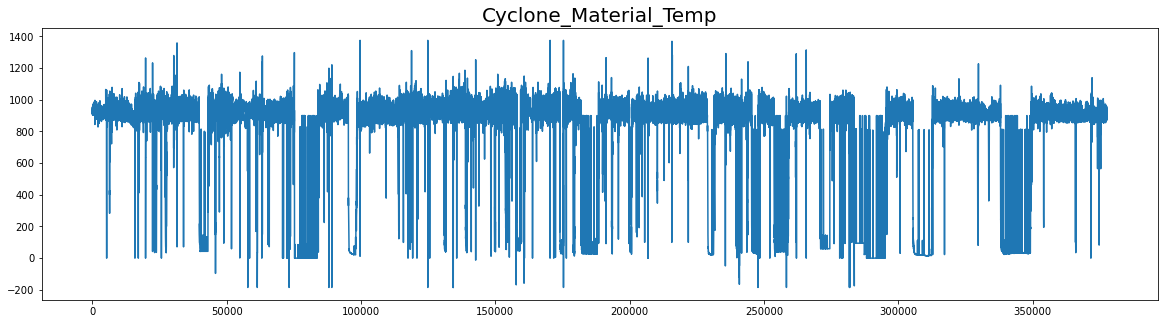

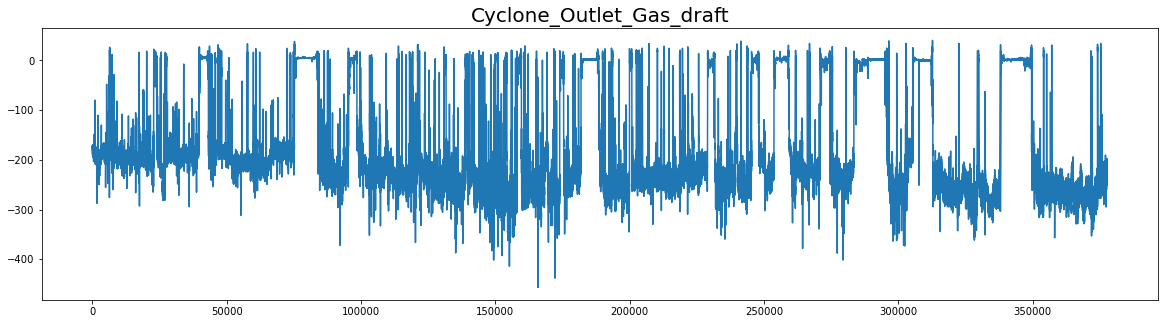

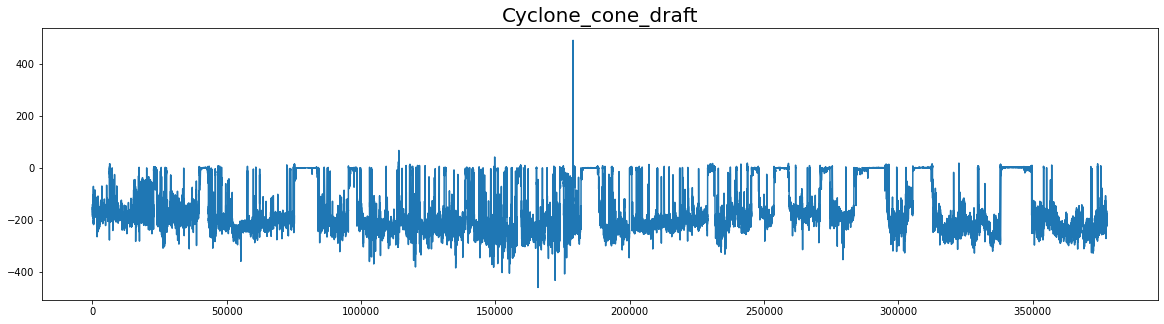

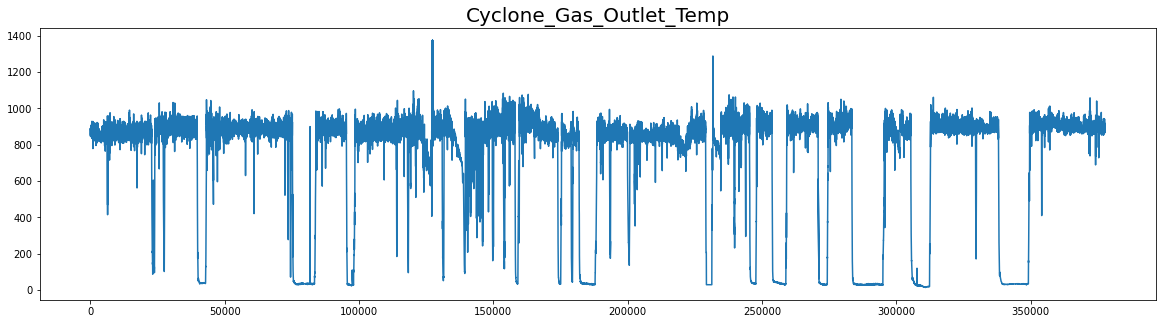

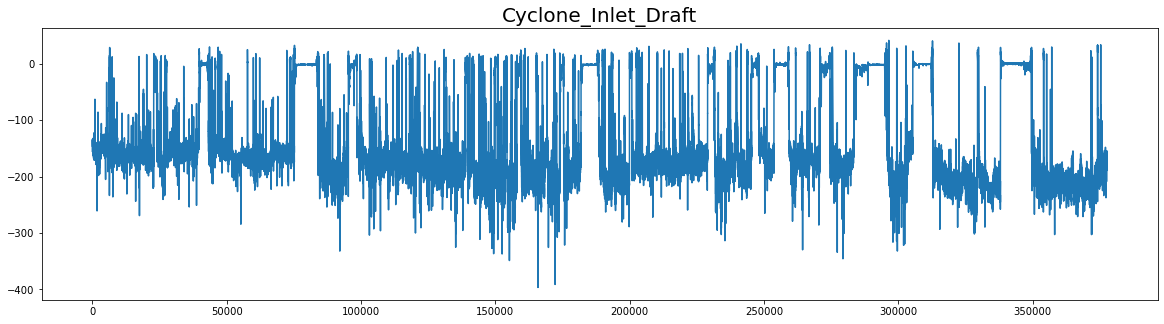

In [18]:
for i in num:
    plt.figure(figsize=(20,5))
    plt.title(i,fontsize=20)
    data[i].plot(x=data[i],y=data.timestamp)
    plt.show()

## `Check data is Stationary or not`

In [23]:
from statsmodels.tsa.stattools import kpss
for i in num:
    statistic, p_value, n_lags, critical_values = kpss(data[i])
        # Format Output
    print(i)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
    print()
    print()
    print()

Cyclone_Inlet_Gas_Temp
KPSS Statistic: 13.303275012267152
p-value: 0.01
num lags: 95
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



Cyclone_Material_Temp
KPSS Statistic: 14.008985810757977
p-value: 0.01
num lags: 95
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



Cyclone_Outlet_Gas_draft
KPSS Statistic: 3.238088518080214
p-value: 0.01
num lags: 95
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



Cyclone_cone_draft
KPSS Statistic: 10.938633214829034
p-value: 0.01
num lags: 95
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



Cyclone_Gas_Outlet_Temp
KPSS Statistic: 10.879390369358267
p-value: 0.01
num lags: 95
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



Cyc

## `Check for seasonality`

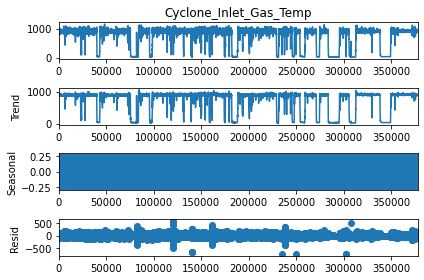

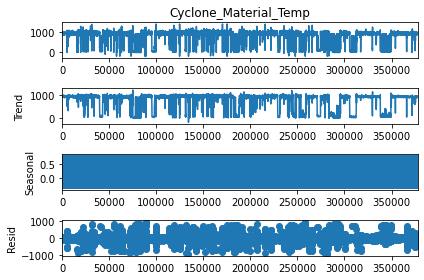

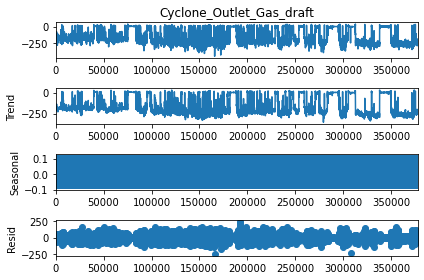

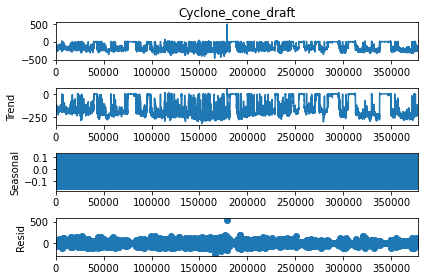

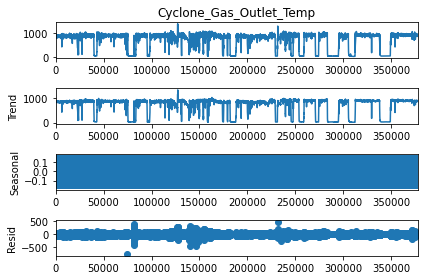

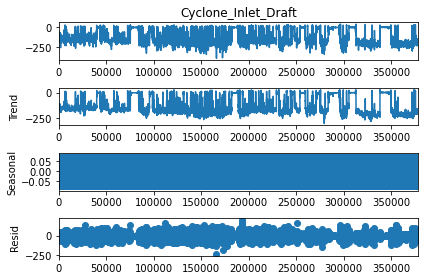

In [28]:
import statsmodels.api as sm
import plotly.express as px
for i in num:
    res = sm.tsa.seasonal_decompose(data[i],freq=12)
    resplot = res.plot()

## `No seasonality found`